In [222]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-1million-tracks/spotify_data.csv


In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

#  Import dataset 

We import the libraries we will use.
We also import our dataset with the pandas library.

In [224]:
data = pd.read_csv('/kaggle/input/spotify-1million-tracks/spotify_data.csv')

We observe the first five data in the dataset.

# Exploratory data analysis

In [225]:
data.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


We look at the shape of the data in the dataset and the last five values.

In [226]:
data.shape

(1159764, 20)

In [227]:
data.tail()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.325,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.788,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.477,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.431,0.000063,0.1250,0.2020,133.885,239133,3
1159763,1473395,Mo' Horizons,Hit the Road Jack (Pé Na Éstrada),4oMiOwhDZEdBuzAfhzRHbi,3,2011,trip-hop,0.782,0.861,1,-7.292,0,0.1250,0.220,0.000008,0.0581,0.8570,89.987,212227,4


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

We display the statistical summary of numerical variables.

In [229]:
data.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


There are 4 categorical variables in the dataset(data type=object)
['artist_name','track_name','track_id','genre'].

We only drop the 'track id' which is useless to us.

In [230]:
data.drop(['track_id'],axis = 1, inplace=True)

In [231]:
data.head()

,Unnamed: 0,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  

We can see that, there are 3 character variables (data type = object),remaining 7 numerical variables (data type = int64) and 9 of them are decimal number data type (data type = float64).

In [233]:
data['genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'ambient', 'black-metal',
       'blues', 'breakbeat', 'cantopop', 'chicago-house', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death-metal', 'deep-house', 'detroit-techno', 'disco',
       'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
       'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german',
       'gospel', 'goth', 'grindcore', 'groove', 'guitar', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'house',
       'indian', 'indie-pop', 'industrial', 'jazz', 'k-pop', 'metal',
       'metalcore', 'minimal-techno', 'new-age', 'opera', 'party',
       'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house',
       'psych-rock', 'punk', 'punk-rock', 'rock', 'rock-n-roll',
       'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
       'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul',
       'spanish', 'swedish', 'tango', 'tec

In [234]:
len(data['genre'].unique())

82

We know that there are 82 category labels in the 'genre' variable.

We can see that there are 3 non-numeric columns in the dataset.


In [235]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['genre'] = le.fit_transform(X['genre'])

In [236]:
data_num = data[['Unnamed: 0' , 'popularity', 'year',
       'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']]

# Feature Scaling
We create a separate data frame for the numpy array.

In [237]:
cols = data_num.columns

In [238]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

data_num = ms.fit_transform(data_num)

In [239]:
data_num = pd.DataFrame(data_num, columns=[cols])

In [240]:
data_num.head()

,Unnamed: 0,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.000000e+00,0.68,0.521739,0.0,0.486405,0.303,0.363636,0.747479,1.0,0.044181,0.696787,0.000000,0.1150,0.139,0.533639,0.039693,0.6
1,6.787046e-07,0.50,0.521739,0.0,0.576032,0.454,0.272727,0.743932,1.0,0.026571,0.478916,0.000014,0.0974,0.515,0.560744,0.035728,0.8
2,1.357409e-06,0.57,0.521739,0.0,0.411883,0.234,0.272727,0.690643,1.0,0.033265,0.339357,0.000050,0.0895,0.145,0.559344,0.026155,0.8
3,2.036114e-06,0.58,0.521739,0.0,0.394763,0.251,0.909091,0.750794,1.0,0.037384,0.810241,0.000000,0.0797,0.508,0.819867,0.050383,0.8
4,2.714818e-06,0.54,0.521739,0.0,0.433031,0.791,0.545455,0.819657,0.0,0.031102,0.072892,0.019300,0.1100,0.217,0.687475,0.040385,0.8


# Creating a Model Object

In [241]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(data_num)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [242]:
kmeans.cluster_centers_


array([[4.39460381e-01, 1.88822088e-01, 5.32005646e-01, 4.55630425e-01,
        5.53888640e-01, 6.58227479e-01, 5.52115311e-01, 7.66454779e-01,
        1.24700250e-12, 9.90466544e-02, 2.91052040e-01, 2.80636107e-01,
        2.16446398e-01, 4.48877919e-01, 4.86344384e-01, 4.25281039e-02,
        7.79238452e-01],
       [4.51825536e-01, 1.80958171e-01, 5.12746274e-01, 4.64722913e-01,
        5.33937871e-01, 6.28986977e-01, 4.39600036e-01, 7.62950664e-01,
        1.00000000e+00, 9.35950638e-02, 3.41120688e-01, 2.36064968e-01,
        2.26802408e-01, 4.59412297e-01, 4.85048810e-01, 4.05283937e-02,
        7.75988522e-01]])

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.
The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

Inertia is not a normalized metric.

The lower values of inertia are better and zero is optimal.

But in very high-dimensional spaces, euclidean distances tend to become inflated .

Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

In [243]:
kmeans.inertia_


1056461.003008146

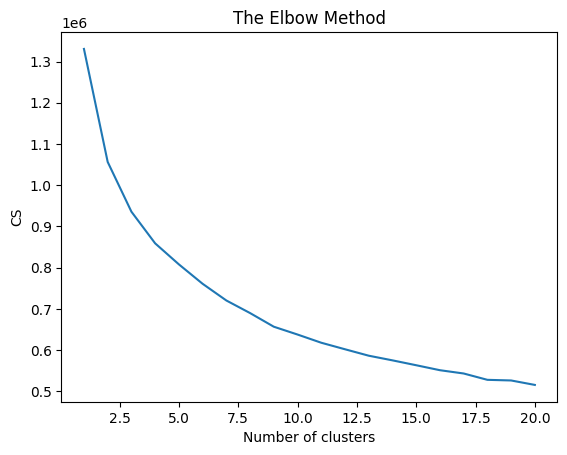

In [244]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_num)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 21), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [245]:
kmeans = KMeans(n_clusters=10, random_state=0)

kmeans.fit(data_num)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)*100))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Result: 23066 out of 1159764 samples were correctly labeled.
Accuracy score: 1.99


In [246]:
kmeans = KMeans(n_clusters=30, random_state=0)

kmeans.fit(data_num)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)*100))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Result: 20282 out of 1159764 samples were correctly labeled.
Accuracy score: 1.75


Since this algorithm did not fit the data set, we could not obtain a suitable result.

# Model Training and Predictions

According to The Elbow Method, the most efficient value we can use is n_clusters=10.

In [247]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0) 

kmeans.fit(data_num)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=0)

We create a labels column according to the estimated cluster value and assign values ​​to that column.

In [248]:
labels2 = kmeans.predict(data_num)

data_num['labels'] = labels2

Corresponded to the last column in the new data set.('labels')

We have a total of 10 label (cluster) values.                            

In [249]:
data_num

,Unnamed: 0,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,labels
0,0.000000e+00,0.68,0.521739,0.0,0.486405,0.303,0.363636,0.747479,1.0,0.044181,0.696787,0.000000,0.1150,0.1390,0.533639,0.039693,0.6,4
1,6.787046e-07,0.50,0.521739,0.0,0.576032,0.454,0.272727,0.743932,1.0,0.026571,0.478916,0.000014,0.0974,0.5150,0.560744,0.035728,0.8,8
2,1.357409e-06,0.57,0.521739,0.0,0.411883,0.234,0.272727,0.690643,1.0,0.033265,0.339357,0.000050,0.0895,0.1450,0.559344,0.026155,0.8,8
3,2.036114e-06,0.58,0.521739,0.0,0.394763,0.251,0.909091,0.750794,1.0,0.037384,0.810241,0.000000,0.0797,0.5080,0.819867,0.050383,0.8,4
4,2.714818e-06,0.54,0.521739,0.0,0.433031,0.791,0.545455,0.819657,0.0,0.031102,0.072892,0.019300,0.1100,0.2170,0.687475,0.040385,0.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,9.999973e-01,0.04,0.478261,1.0,0.375629,0.742,0.909091,0.803569,0.0,0.075798,0.326305,0.000141,0.1590,0.5220,0.431816,0.057005,0.6,5
1159760,9.999980e-01,0.03,0.478261,1.0,0.519637,0.675,0.636364,0.785910,0.0,0.033574,0.791165,0.000129,0.1300,0.2640,0.479601,0.047178,0.8,5
1159761,9.999986e-01,0.02,0.478261,1.0,0.494461,0.440,0.454545,0.771533,1.0,0.028218,0.478916,0.003130,0.0936,0.0351,0.400315,0.035373,0.8,4
1159762,9.999993e-01,0.00,0.478261,1.0,0.483384,0.405,0.000000,0.696369,1.0,0.028424,0.432731,0.000063,0.1250,0.2020,0.535555,0.039520,0.6,4


Since we ran the algorithm on large data (1 million), it was quite late and costly. Therefore, instead of this process, we can perform faster and less costly operations with direct classification algorithms.